# Análisis exploratorio de los Datos.

Importemos las librerías que utilizaremos para realizar nuestro análisis.


In [84]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
sns.set(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')
import json
from urllib.request import urlopen

Hacemos la solicitud de las principales características de las criptommonedas que nos brinda la API de CoinGekco, a través del archivo de python *'get_market_data.py'*. 

En este notebook procederemos a hacer el análisis de las criptosmonedas con datos del 11 de Agosto de 2023.
Guardado en el archivo *'criptos_market_data.csv'*.

In [3]:
data_list = pd.read_csv("criptos_market_data.csv")

In [4]:
# Transformamos la data recibida, en un dataframe.
df = pd.DataFrame(data_list)
# Veamos cuantas filas y columnas tiene el dataframe.
df.shape

(10000, 29)

```La dirección web de la que obtuvimos la solicitud es la Web de CoinGekco.``` ([Documentation](https://www.coingecko.com/es/api/documentation))

Como podemos ver, el documento tiene 10000 Coins con información.

Visualizamos las 5 primeras criptomonedas.


In [5]:
df.head()

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated,price_change_percentage_1y_in_currency,price_change_percentage_24h_in_currency,price_change_percentage_30d_in_currency
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,29457.103873,5.727006e+11,1.0,6.182061e+11,1.070401e+10,29582.000000,...,-57.37351,2021-11-10T14:24:11.849Z,67.810000,43303.32523,2013-07-06T00:00:00.000Z,NaN,2023-08-11T14:17:33.265Z,19.220152,-0.333298,-3.957180
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1850.353133,2.223090e+11,2.0,2.223090e+11,3.823547e+09,1857.860000,...,-62.07591,2021-11-10T14:24:19.604Z,0.432979,427180.83123,2015-10-20T00:00:00.000Z,"{'times': 82.97991784388267, 'currency': 'btc'...",2023-08-11T14:17:29.848Z,-3.300723,-0.335331,-1.763311
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.998192,8.342700e+10,3.0,8.342700e+10,1.485051e+10,1.000000,...,-24.50532,2018-07-24T00:00:00.000Z,0.572521,74.46811,2015-03-02T00:00:00.000Z,NaN,2023-08-11T14:15:02.875Z,-0.216276,-0.006812,-0.261853
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,240.476917,3.701673e+10,4.0,4.811863e+10,3.225118e+08,242.330000,...,-64.94926,2021-05-10T07:24:17.097Z,0.039818,604042.33058,2017-10-19T00:00:00.000Z,NaN,2023-08-11T14:17:35.772Z,-27.569431,-0.670509,-2.418243
4,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.632780,3.336331e+10,5.0,6.320330e+10,9.825510e+08,0.639057,...,-81.38508,2018-01-07T00:00:00.000Z,0.002686,23450.63617,2014-05-22T00:00:00.000Z,NaN,2023-08-11T14:17:31.035Z,65.089207,0.068434,34.131775


Vemos las columnas y tomamos de ellas las que consideremos óptimas para realizar nuestro análisis.

In [8]:
df.columns

Index(['id', 'symbol', 'name', 'image', 'current_price', 'market_cap',
       'market_cap_rank', 'fully_diluted_valuation', 'total_volume',
       'high_24h', 'low_24h', 'price_change_24h',
       'price_change_percentage_24h', 'market_cap_change_24h',
       'market_cap_change_percentage_24h', 'circulating_supply',
       'total_supply', 'max_supply', 'ath', 'ath_change_percentage',
       'ath_date', 'atl', 'atl_change_percentage', 'atl_date', 'roi',
       'last_updated', 'price_change_percentage_1y_in_currency',
       'price_change_percentage_24h_in_currency',
       'price_change_percentage_30d_in_currency'],
      dtype='object')

De las columnas obtenidas en el cuadro anterior, comentamos las columnas que no queremos que estén dentro de nuestro dataframe. El cual analizaremos con la copia de este en otro dataframe.


In [9]:
df1 = df[[
    #'id',
#    'symbol', 
    'name',
#    'image', 
    'current_price', 'market_cap',
    'market_cap_rank', 
    #    'fully_diluted_valuation', 
    'total_volume',
    #    'high_24h', 
    # 'low_24h', 
    # 'price_change_24h',
    #'price_change_percentage_24h',
    'market_cap_change_24h',
    #    'market_cap_change_percentage_24h',
    'circulating_supply',
    'total_supply',
    'max_supply',
    'ath',
    'ath_change_percentage',
    'ath_date', 
    #    'atl', 
    # 'atl_change_percentage', 
    # 'atl_date',
    #    'roi',
    #    'last_updated',
    'price_change_percentage_1y_in_currency',
    'price_change_percentage_30d_in_currency',
    'price_change_percentage_24h_in_currency'
    ]].copy()

---------------

```
Brindamos una breve descripción de las columnas, para ampliar el conocimiento de que clase de datos contiene este dataframe.
```
**name:** Nombre de la criptomoneda.

**current_price:** Precio actual de la moneda, expresado en U$D *(Dólares estadounidenses)*

**market_cap**: Es la capitalización del mercado de la criptomoneda. Es decir, el producto entre el valor actual de la moneda y las cantidad total de la moneda en circulación.

**market_cap_rank:** Es el número del ranking en el que se encuentra, de mayor a menor, en función de su capitalización. *(Este análisis se basa en las 12 criptomonedas que están en lo más alto de este ranking)*

**total_volume**: Representa el total de operaciones que se realizan con la moneda.

**market_cap_change_24h:** Es el valor de cambio de la moneda en las últimas 24 horas.

**circulating_supply:** Representa la cantidad de monedas en circulación de la Criptomoneda.

**total_supply:** La cantidad total de monedas de una criptomoneda que existirá en total.

**max_supply:**  La cantidad máxima de monedas que una criptomoneda puede tener en circulación, si está limitada.

**ath:** El precio más alto al que llegó la criptomoneda.

**ath_change_percentage:**  El cambio porcentual desde el máximo histórico de una criptomoneda.

**ath_date:** La fecha en que se alcanzó el máximo histórico de una criptomoneda.

**price_change_percentage_1y_in_currency:** El cambio porcentual en el precio de la criptomoneda en el último año.

**price_change_percentage_30d_in_currency**: El cambio porcentual en el precio de la criptomoneda en los últimos 30 días.

**price_change_percentage_24h_in_currency:** El cambio porcentual en el precio de la criptomoneda en las últimas 24 horas.

--------------------------------------

Continuamos con el análisis.

Vemos ahora que el dataframe ha conservado todas la filas con las correspondientes Coins, pero ha reducido a 15 las columnas.


In [10]:
df1.shape

(10000, 15)

Visualicemos el dataframe.


In [11]:
df1

,name,current_price,market_cap,market_cap_rank,total_volume,market_cap_change_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,ath_date,price_change_percentage_1y_in_currency,price_change_percentage_30d_in_currency,price_change_percentage_24h_in_currency
0,Bitcoin,29457.103873,5.727006e+11,1.0,1.070401e+10,-4.420035e+09,1.945421e+07,2.100000e+07,2.100000e+07,69045.00,-57.37351,2021-11-10T14:24:11.849Z,19.220152,-3.957180,-0.333298
1,Ethereum,1850.353133,2.223090e+11,2.0,3.823547e+09,-1.455037e+09,1.201497e+08,1.201497e+08,NaN,4878.26,-62.07591,2021-11-10T14:24:19.604Z,-3.300723,-1.763311,-0.335331
2,Tether,0.998192,8.342700e+10,3.0,1.485051e+10,-5.435169e+07,8.353343e+10,8.353343e+10,NaN,1.32,-24.50532,2018-07-24T00:00:00.000Z,-0.216276,-0.261853,-0.006812
3,BNB,240.476917,3.701673e+10,4.0,3.225118e+08,-3.168033e+08,1.538562e+08,1.538562e+08,2.000000e+08,686.31,-64.94926,2021-05-10T07:24:17.097Z,-27.569431,-2.418243,-0.670509
4,XRP,0.632780,3.336331e+10,5.0,9.825510e+08,-8.103782e+07,5.278728e+10,9.998852e+10,1.000000e+11,3.40,-81.38508,2018-01-07T00:00:00.000Z,65.089207,34.131775,0.068434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Decentral ART,NaN,NaN,NaN,NaN,NaN,NaN,2.500000e+09,2.500000e+09,NaN,0.00000,NaN,NaN,NaN,NaN
9996,Mudra MDR,0.187786,NaN,NaN,6.828800e+04,NaN,NaN,1.000000e+09,1.000000e+09,NaN,0.00000,NaN,NaN,NaN,NaN
9997,Mudra,NaN,NaN,NaN,NaN,NaN,NaN,1.500000e+09,NaN,NaN,0.00000,NaN,NaN,NaN,NaN
9998,Cascadia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN


Vemos ahora, cuales son los tipos de datos que están contenidos en las columnas de este dataframe.

In [12]:
df1.dtypes

name                                        object
current_price                              float64
market_cap                                 float64
market_cap_rank                            float64
total_volume                               float64
market_cap_change_24h                      float64
circulating_supply                         float64
total_supply                               float64
max_supply                                 float64
ath                                        float64
ath_change_percentage                      float64
ath_date                                    object
price_change_percentage_1y_in_currency     float64
price_change_percentage_30d_in_currency    float64
price_change_percentage_24h_in_currency    float64
dtype: object

Vemos que la columna de *'ath_date'* contiene datos en un formato que podría modficar el análisis. Puesto que en esa columna debe ir una fecha, en la cual la moneda alcanzó su precio más alto.

Veamos como podemos modificarlo, para obtener los datos en un formato de fecha.

In [15]:
# Primero observemos si tiene valores nulos.
df1['ath_date'].isnull().sum()

416

Modifiquemos la columna para que no ocurra ningún error.

In [17]:
# Con el método 'fillna' de pandas, podemos modificar los valores nulos.
df1['ath_date'].fillna("", inplace= True)

In [18]:
# Veamos un ejemplo de como están escritas las fechas:
df1['ath_date'][0]

'2021-11-10T14:24:11.849Z'

In [19]:
# Creamos una lista donde pasaremos los strings de la columna 'ath_date'.
lista_de_fechas=[]
# Creamos un bucle que itere en la columna.
for txt in df1['ath_date']:
    # Creamos un strings vacío que irá agregando cada letra que corresponda.
    strings = ""
    # Iteramos por cada letra del string.
    for letra in txt:
        # Si la letra, que no es número, es la letra "T" se agregará un espacio.
        if letra == "T":
            strings = str(strings) + " "
        # Cuando, en la iteración, la letra es un punto la iteración se interrumpe y continúa al siguiente string.
        elif letra == ".":
            break
        # Si no cumple ninguna de las excepciones anteriores, agrega la letra al string.
        else:
            strings = str(strings) + str(letra)
    # Cuando se detiene el bucle de iteración y la variable 'strings' contiene la información, se agrega a 'lista_de_fechas'
    lista_de_fechas.append(strings)
# Transformamos los datos a un formato fecha y lo asignamos a la columna.
df1['ath_date'] = pd.to_datetime(lista_de_fechas)

Verifiquemos que el cambio en la columna se haya producido correctamente:

In [20]:
df1.dtypes

name                                               object
current_price                                     float64
market_cap                                        float64
market_cap_rank                                   float64
total_volume                                      float64
market_cap_change_24h                             float64
circulating_supply                                float64
total_supply                                      float64
max_supply                                        float64
ath                                               float64
ath_change_percentage                             float64
ath_date                                   datetime64[ns]
price_change_percentage_1y_in_currency            float64
price_change_percentage_30d_in_currency           float64
price_change_percentage_24h_in_currency           float64
dtype: object

Veamos el ejemplo anterior:

In [21]:
df1['ath_date'][0]

Timestamp('2021-11-10 14:24:11')

Para obtener un análisis más profundo y detallado nos enfocaremos en las monedas con mayor capitalización. De la siguiente manera podemos obtener esos datos.

In [33]:
df2 = df1.head(15)

Ahora observemos cuando obtuvieron su precio más alto, cada Coin. Del más antiguo al más reciente.

In [34]:
df2[['name', 'ath_date', 'ath']].sort_values('ath_date', ascending= True)

,name,ath_date,ath
10,TRON,2018-01-05 00:00:00,0.231673
4,XRP,2018-01-07 00:00:00,3.400000
2,Tether,2018-07-24 00:00:00,1.320000
5,USD Coin,2019-05-08 00:40:28,1.170000
7,Dogecoin,2021-05-08 05:08:23,0.731578
13,Litecoin,2021-05-10 03:13:07,410.260000
3,BNB,2021-05-10 07:24:17,686.310000
8,Cardano,2021-09-02 06:00:10,3.090000
14,Shiba Inu,2021-10-28 03:54:55,0.000086
12,Polkadot,2021-11-04 14:10:09,54.980000


Como podemos ver en la tabla, las criptos que obtuvieron su precio más alto en una fecha más reciente, lo tuvieron en un mismo año, en un lapso de siete meses. Podríamos considerar que el mercado de criptomonedas estuvo en alza en esos meses y considerarlo como hipótesis. Luego podemos solicitar otros datos a la API, para poder confirmar o refutar esta hipótesis.

Pero por ahora, prosigamos con el análisis de este dataset.

Como podemos ver en la tabla anterior, los precios más altos de las criptomonedas pueden estar distanciados por miles de dólares. Veamos el precio actual de cada uno y la cantidad de monedas que están en circulación, para ver si existe una relación.

Como podemos ver, a pesar de que Lido Staker Ether no continue el patrón que las otras monedas siguen, existe una relación entre la cantidad de monedas en circulación y el precio. Mientras la cantidad de monedas en circulación aumenta, el precio de las Coins disminuye. 
Veamos un gráfico.

In [35]:
# Aplicamos un 'sort_values' para visualizar, de menor a mayor, las Coins con menos monedas en circulación.
df2[['name','current_price', 'circulating_supply']].sort_values('circulating_supply', ascending= True)

,name,current_price,circulating_supply
6,Lido Staked Ether,1848.784599,8.053080e+06
0,Bitcoin,29457.103873,1.945421e+07
13,Litecoin,83.306035,7.352976e+07
1,Ethereum,1850.353133,1.201497e+08
3,BNB,240.476917,1.538562e+08
9,Solana,24.641123,4.058490e+08
12,Polkadot,4.997588,1.262954e+09
11,Polygon,0.685823,9.319469e+09
5,USD Coin,0.998240,2.602342e+10
8,Cardano,0.295478,3.504502e+10


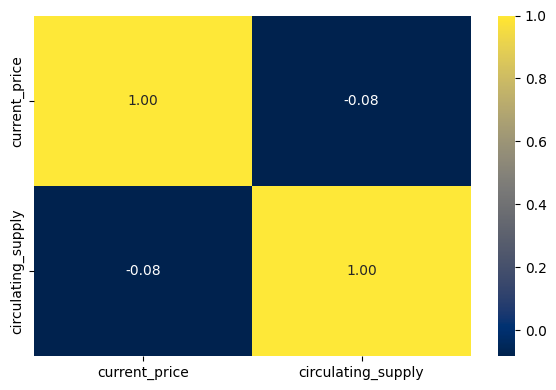

In [36]:
corr = df2[['current_price', 'circulating_supply']].corr()
fig = plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot= True, cmap= 'cividis', fmt= ".2f")

plt.tight_layout()
plt.show()

Como la matriz nos muestra, la correlación entre las variables es negativa, significa que mientras una variable sube, la otra disminuye. Es decir, mientras la cantidad de monedas es mayor, el precio disminuye. Si bien es una relación que existe, es una relación que casi no afecta el mercado, no está directamente relacionada con los precios, existen muchas otras razones por las cuales esto también puede suceder.

Procedamos a revisar la capitalización de las criptomonedas.

In [37]:
df2[['name', 'market_cap', 'current_price', 'circulating_supply']]

,name,market_cap,current_price,circulating_supply
0,Bitcoin,5.727006e+11,29457.103873,1.945421e+07
1,Ethereum,2.223090e+11,1850.353133,1.201497e+08
2,Tether,8.342700e+10,0.998192,8.353343e+10
3,BNB,3.701673e+10,240.476917,1.538562e+08
4,XRP,3.336331e+10,0.632780,5.278728e+10
5,USD Coin,2.602265e+10,0.998240,2.602342e+10
6,Lido Staked Ether,1.488998e+10,1848.784599,8.053080e+06
7,Dogecoin,1.063232e+10,0.075661,1.405469e+11
8,Cardano,1.035275e+10,0.295478,3.504502e+10
9,Solana,9.981431e+09,24.641123,4.058490e+08


Calculemos la capitalización a partir del precio actual y la cantidad de monedas en circulación.

In [40]:
calculated_cap = df1['current_price'] * df1['circulating_supply']
df2['calculated_cap'] = calculated_cap

df2[['name', 'calculated_cap', 'market_cap', 'current_price']]

,name,calculated_cap,market_cap,current_price
0,Bitcoin,5.730647e+11,5.727006e+11,29457.103873
1,Ethereum,2.223194e+11,2.223090e+11,1850.353133
2,Tether,8.338241e+10,8.342700e+10,0.998192
3,BNB,3.699885e+10,3.701673e+10,240.476917
4,XRP,3.340276e+10,3.336331e+10,0.632780
5,USD Coin,2.597761e+10,2.602265e+10,0.998240
6,Lido Staked Ether,1.488841e+10,1.488998e+10,1848.784599
7,Dogecoin,1.063388e+10,1.063232e+10,0.075661
8,Cardano,1.035505e+10,1.035275e+10,0.295478
9,Solana,1.000057e+10,9.981431e+09,24.641123


Como podemos ver, son similares en cierto punto. Aunque, es verdad, la notación científica dentro de la columna de ```calculated_cap``` produce discrepancia entre el dato obtenido de CoinGekco y el dato calculado.

También podemos sacar una conclusión de esta tabla: El precio de la Coin no tiene relación con su capitalización, es decir; que la Coin aumente su valor no significa que su capitalización aumente, ya que ésta también depende de la cantidad de monedas que haya en circulación.

Analicemos, a continuación, que tantos cambios tuvieron estas criptomonedas en distintos lapsos de tiempo.

In [43]:
df2[['name','current_price','market_cap', 'price_change_percentage_1y_in_currency', 'price_change_percentage_30d_in_currency', 'price_change_percentage_24h_in_currency']].sort_values("current_price")

,name,current_price,market_cap,price_change_percentage_1y_in_currency,price_change_percentage_30d_in_currency,price_change_percentage_24h_in_currency
14,Shiba Inu,0.000010,5.941498e+09,-20.140894,34.259637,1.367486
7,Dogecoin,0.075661,1.063232e+10,2.995697,16.363712,-0.521187
10,TRON,0.077022,6.892277e+09,8.315408,-0.881446,-0.262346
8,Cardano,0.295478,1.035275e+10,-45.586266,1.540298,-1.229314
4,XRP,0.632780,3.336331e+10,65.089207,34.131775,0.068434
11,Polygon,0.685823,6.391256e+09,-27.467082,-6.982251,-1.138422
2,Tether,0.998192,8.342700e+10,-0.216276,-0.261853,-0.006812
5,USD Coin,0.998240,2.602265e+10,-0.263814,-0.065149,-0.102183
12,Polkadot,4.997588,6.309252e+09,-47.169140,-4.250275,-0.635477
9,Solana,24.641123,9.981431e+09,-44.520106,9.896974,0.053799


```RECORDAR QUE LAS COLUMNAS CON LOS CAMBIOS PORCENTUALES EQUIVALEN AL CAMBIO PORCENTUAL DE LA MONEDA RESPECTO A SÍ MISMA EN EL TIEMPO CORRESPONDIENTE.```

Podemos catalogar a las Coins en tres categorías, según como les fue en el último año, último mes y las últimas 24hrs.

```Monedas que aumentaron su precio - Monedas que perdieron valor - Monedas que permanecieron estables```

Monedas que aumentaron su precio en el último año, como **XRP**, **Bitcoin**, **Litecoin** o **Dogecoin**, que tuvieron un crecimiento porcentual cuasi constante en el último año. Por lo que también logró mantener en margen su precio durante los últimos 30 días.

Hubo monedas que perdieron su precio en el último año, como **Cardano**, **Polkadot** o **Solana**, que parece que tuvieron dismunución en el valor de su Coin y tuvieron esta disminución de manera prolongada, lo que llevó a las monedas a tener un decrecimiento porcentual el último año.

Y, por último, hubo monedas estables, que mantuvieron su precio en el último año y que, según los datos, tuvieron estabilidad durante todo el periodo. Algunas de estas monedas, dentro del mercado de las criptomonedas, también son llamadas StableCoins. Como **USD Coin** o **Theter**.

In [45]:
df2.columns

Index(['name', 'current_price', 'market_cap', 'market_cap_rank',
       'total_volume', 'market_cap_change_24h', 'circulating_supply',
       'total_supply', 'max_supply', 'ath', 'ath_change_percentage',
       'ath_date', 'price_change_percentage_1y_in_currency',
       'price_change_percentage_30d_in_currency',
       'price_change_percentage_24h_in_currency', 'calculated_cap'],
      dtype='object')

Veamos ahora cuanto porcentaje del total de monedas disponibles está circulando en el mercado actualmente.

In [53]:
percent_ = df2['circulating_supply'] * 100 / df2['total_supply']
df2['percent_of_supply'] = percent_
df2[['name', 'total_supply', 'circulating_supply', 'percent_of_supply']]

,name,total_supply,circulating_supply,percent_of_supply
0,Bitcoin,2.100000e+07,1.945421e+07,92.639105
1,Ethereum,1.201497e+08,1.201497e+08,100.000000
2,Tether,8.353343e+10,8.353343e+10,100.000000
3,BNB,1.538562e+08,1.538562e+08,100.000000
4,XRP,9.998852e+10,5.278728e+10,52.793345
5,USD Coin,2.602683e+10,2.602342e+10,99.986894
6,Lido Staked Ether,8.053080e+06,8.053080e+06,100.000000
7,Dogecoin,1.405468e+11,1.405469e+11,100.000078
8,Cardano,4.500000e+10,3.504502e+10,77.877824
9,Solana,5.545778e+08,4.058490e+08,73.181614


Como se muestra en la tabla, hay 5 monedas que ya han alcanzado la cantidad máxima de monedas que pueden estar en circulación. Por lo que no habrá nuevas unidades de esas monedas, a menos que se amplie su límite.
Mientras que hay otras monedas que están cercanas al 100%.
Y otras que están por encima de 50% y por encima del 70%.

---

Vamos a comenzar a analizar el mercado, desde el aspecto histórico. Primero empezamos con la criptomoneda más conocida a nivel mundial: Bitcoin.

Hagamos la solicitud a la API.

In [98]:
url = 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=max&interval=daily&precision=5'

response = urlopen(url)
data = json.loads(response.read())
df_coin = pd.DataFrame(data)
df_coin

,prices,market_caps,total_volumes
0,"[1367107200000, 135.3]","[1367107200000, 1500517590]","[1367107200000, 0]"
1,"[1367193600000, 141.96]","[1367193600000, 1575032004.0]","[1367193600000, 0.0]"
2,"[1367280000000, 135.3]","[1367280000000, 1501657493.0]","[1367280000000, 0.0]"
3,"[1367366400000, 117.0]","[1367366400000, 1298951550.0]","[1367366400000, 0.0]"
4,"[1367452800000, 103.43]","[1367452800000, 1148667722.0]","[1367452800000, 0.0]"
...,...,...,...
3754,"[1691625600000, 29585.48808]","[1691625600000, 575535414817.4033]","[1691625600000, 14633310097.491423]"
3755,"[1691712000000, 29423.81892]","[1691712000000, 572414205818.4142]","[1691712000000, 8106253519.025447]"
3756,"[1691798400000, 29396.84797]","[1691798400000, 571976559045.8302]","[1691798400000, 4651950357.636653]"
3757,"[1691884800000, 29412.14227]","[1691884800000, 572257798803.9086]","[1691884800000, 3994297895.288944]"


Vemos que existe un parámetro dentro de cada dato, que podría referir al momento en el que se registra el dato correspondiente. Hagamos las transformaciones para poder obtener una tabla más detallada y mejor trabajada.

Hagamos las transformaciones necesarias para esto:

In [99]:
# Importamos la librería datetime, que nos brindará el método para poder transformar a tipo datetime64 nuestros datos
import datetime
# Creamos una nueva columna que contendrá, únicamente, los datos de las fechas.
df_coin['dates'] = [x[0] for x in df_coin['prices']]
# Transformamos el dato para poder pasarle al método 'utcfromtimestamp()' un argumento válido.
df_coin['dates'] = df_coin['dates'].apply(lambda x: x / 1000)
# Utilizamos el método para obtener en nuestra columna 'dates' los valores de las fechas.
df_coin['dates'] = df_coin['dates'].apply(lambda x: datetime.datetime.utcfromtimestamp(x))
# Ahora transformamos las columnas originales para solamente tener los valores cuantitavos.
df_coin['prices'] = [x[1] for x in df_coin['prices']]
df_coin['market_caps'] = [x[1] for x in df_coin['market_caps']]
df_coin['total_volumes'] = [x[1] for x in df_coin['total_volumes']]

# Mostramos el dataset.
df_coin

,prices,market_caps,total_volumes,dates
0,135.30000,1.500518e+09,0.000000e+00,2013-04-28 00:00:00
1,141.96000,1.575032e+09,0.000000e+00,2013-04-29 00:00:00
2,135.30000,1.501657e+09,0.000000e+00,2013-04-30 00:00:00
3,117.00000,1.298952e+09,0.000000e+00,2013-05-01 00:00:00
4,103.43000,1.148668e+09,0.000000e+00,2013-05-02 00:00:00
...,...,...,...,...
3754,29585.48808,5.755354e+11,1.463331e+10,2023-08-10 00:00:00
3755,29423.81892,5.724142e+11,8.106254e+09,2023-08-11 00:00:00
3756,29396.84797,5.719766e+11,4.651950e+09,2023-08-12 00:00:00
3757,29412.14227,5.722578e+11,3.994298e+09,2023-08-13 00:00:00


Ahora que están mejor distribuidos los datos, podemos ver de forma gráfica como se vio el mercado de ***Bitcoin*** desde Abril de 2013.

Primero veamos como fue variando el precio de esta Cripto:

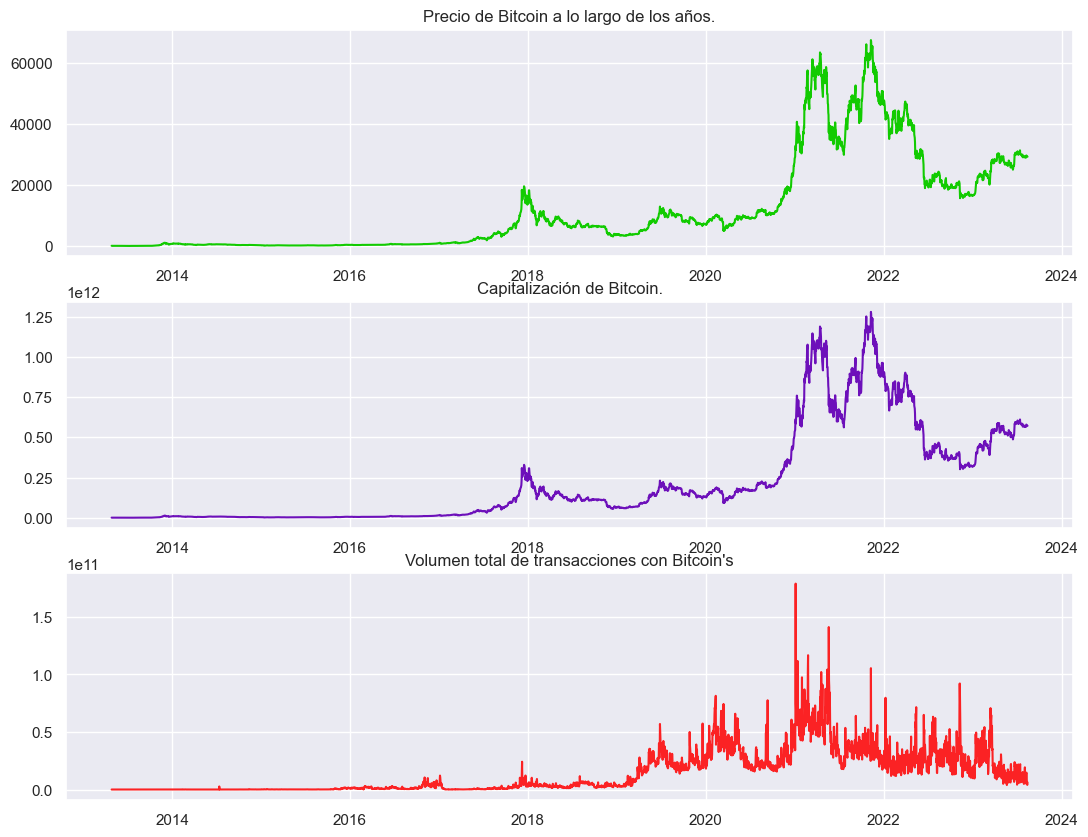

In [101]:
fig, axs = plt.subplots(3, 1, figsize= (13, 10))
axs[0].plot(df_coin['dates'], df_coin['prices'], color= "#12Cb01")
axs[0].set_title("Precio de Bitcoin a lo largo de los años.")

axs[1].plot(df_coin['dates'], df_coin['market_caps'], color= "#6d10ba")
axs[1].set_title("Capitalización de Bitcoin.")

axs[2].plot(df_coin['dates'], df_coin['total_volumes'], color= "#fb2224")
axs[2].set_title("Volumen total de transacciones con Bitcoin's")
plt.show()

Como nos muestras los gráficos, existe un relación directa entre el precio del Bitcoin y su valor de capitalización. En los picos de alza del precio, la capitalización sigue la misma forma de crecimiento y decrecimiento. En cambio, se podría decir que el volumen de transacciones con Bitcoin es independiente de que precio tiene la moneda.

Veamos ahora la matriz de correlación de este dataset.

<Axes: >

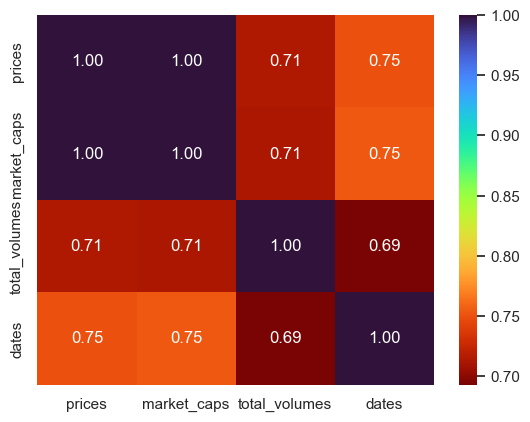

In [105]:
corr = df_coin.corr()

sns.heatmap(corr, cmap= 'turbo_r', annot= True, fmt=".2f")

Como se ve en la matriz de correlación, la relación entre el precio y la capitalización de la moneda existe y es lineal. Esto es así porque para calcular la capitalización, un término necesario es el precio de la moneda.

Podemos sacar la conclusión de que el volumen de las transacciones también está relacionado con el precio y capitalización del Bitcoin. Que las transacciones aumentan cuando también aumenta el precio de la moneda.